<a href="https://colab.research.google.com/github/VanJoaoPedro/Deep-Learning-Python/blob/master/model/test_emotion_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile

In [2]:
%tensorflow_version 2.x

In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tf.__version__

'2.3.0'

# Connecting with the drive and accessing files


In [4]:
path = '/content/drive/My Drive/teste_modelo.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/My Drive/teste_modelo.zip' mode='r'>>

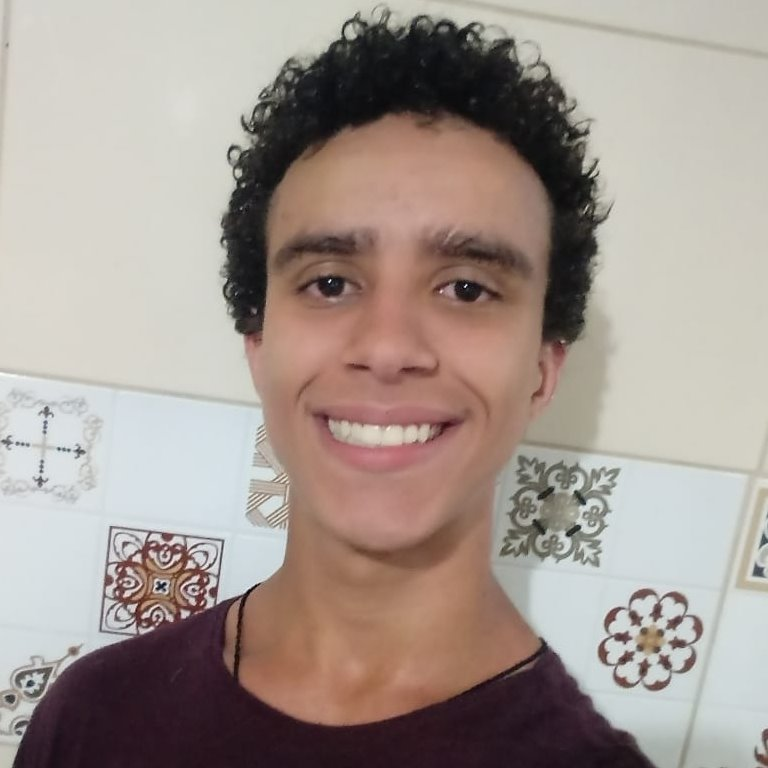

In [5]:
image = cv2.imread('eu.jpg', )
cv2_imshow(image)

In [6]:
image.shape

(768, 768, 3)

# Testing the detector

 Loading models

In [7]:
cascade_faces = 'haarcascade_frontalface_default.xml'
path_model = 'model_01_expressions.h5'
face_detection = cv2.CascadeClassifier(cascade_faces)
classifier_emotions = load_model(path_model, compile=False)
expressions = ['Raiva', 'Nojo', 'Medo', 'Feliz', 'Triste', 'Assustado', 'Neutro']

Face detection


In [8]:
original = image.copy()
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                        minNeighbors = 3, minSize = (20, 20))

In [9]:
faces

array([[186, 118, 418, 418]], dtype=int32)

In [10]:
len(faces)

1

Extraction of ROI (Region of interest)

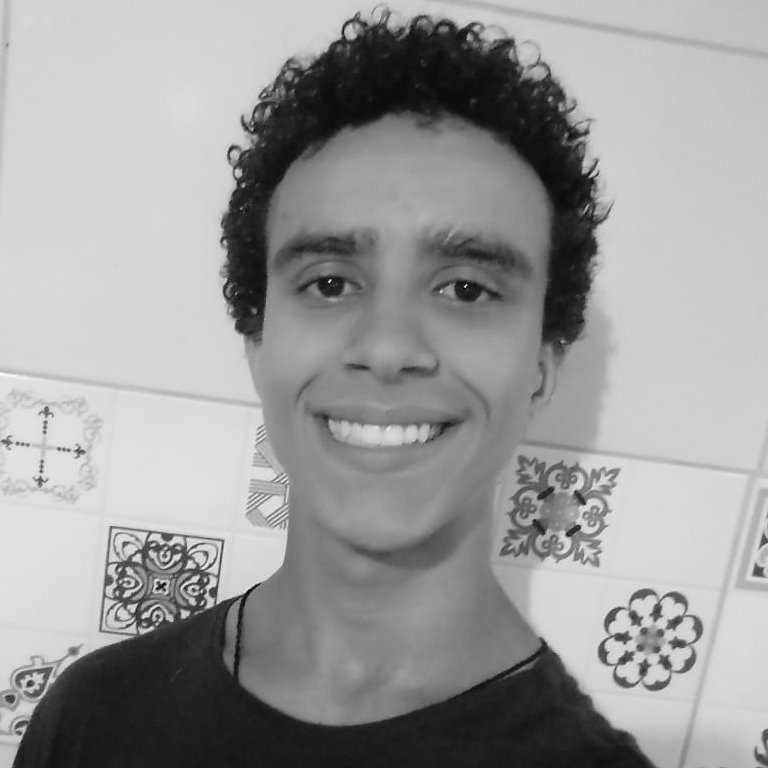

In [11]:
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [12]:
probability = np.ones((250, 300, 3), dtype='uint8') * 255

In [13]:
for (x, y, w, h) in faces:
    roi = gray[y:y + h, x:x + w]
    roi = cv2.resize(roi, (48, 48))

    roi = roi.astype('float') / 255
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)

    preds = classifier_emotions.predict(roi)[0]

    emotion_probability = np.max(preds)

    label = expressions[preds.argmax()]

    cv2.putText(original, label, (x, y -5), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
                (0, 0, 255), 2, cv2.LINE_AA)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
for (i, (emotion, prob)) in enumerate(zip(expressions, preds)):
    text = '{}: {:.2f}%'.format(emotion, prob*100)
    width = int(prob * 300)
    cv2.rectangle(probability, (7, (i * 35) + 5), (width, (i * 35) + 35), (200, 250, 20), -1)
    cv2.putText(probability, text, (10, (i*35)+23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0,0,0), 1, cv2.LINE_AA)


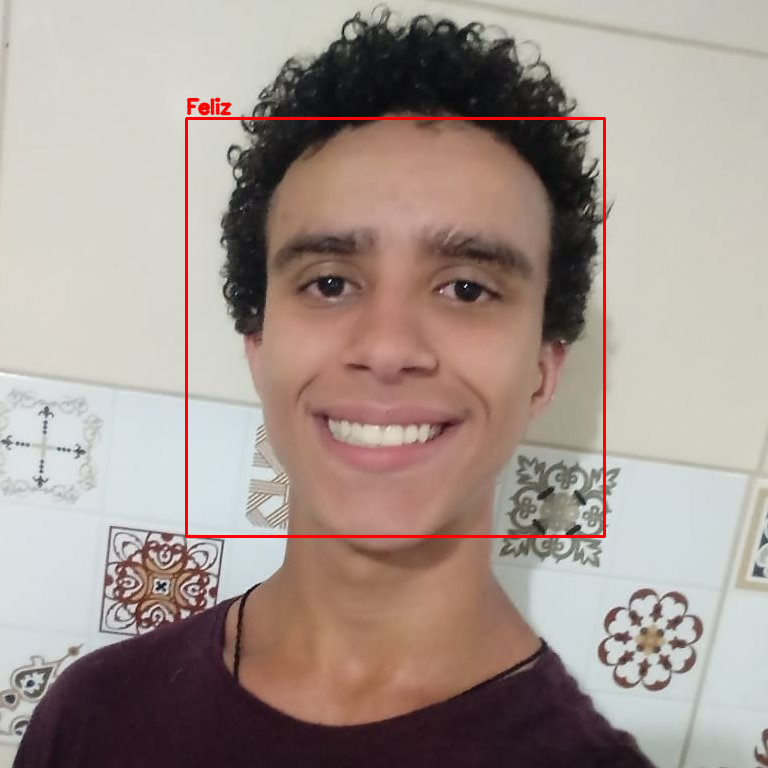

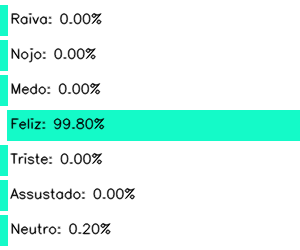

In [14]:
cv2_imshow(original)
cv2_imshow(probability)